## 1 Outliers

### 1.1 Feature Engineering & Data Preprocessing

_Feature Engineering (Özellik Mühendisliği)_

Eng
- Working on the features
- Creating features from the raw data

----
Tr
- Özellikler üzerinde geliştirilen çalışmalar
- Ham veriden değişken üretmek

------

_Data PreProcessing_

Eng
- It is the process of making the data suitable before the studies.

----

Tr
- Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

### 1.2 Import libraries

In [1]:
from datetime import date

# !pip install missingno
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

### 1.3 Information about Outliers - load_titanic Dataset

Values that deviate considerably from the general trend in the data are called outliers.

Verideki genel eğilimin oldukça dışına çıkan değerlere aykırı değer denir.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
# Data set for large scale application
def load_titanic_application_train():
    data = pd.read_csv("datasets/application_train2.csv")
    return data


df_application = load_titanic_application_train()
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Data set for small scale application
def load_titanic():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df_titanic = load_titanic()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### 1.4 Finding Outliers

#### 1.4.1 Outliers with Graphical Technique

<AxesSubplot:xlabel='Age'>

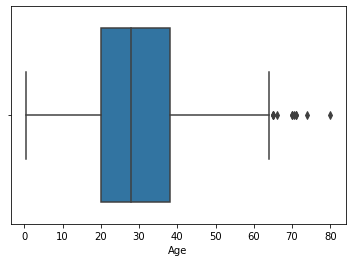

In [5]:
sns.boxplot(x=df_titanic["Age"])

#### 1.4.2 How to Catch Outliers?

In [6]:
q1 = df_titanic["Age"].quantile(0.25)  # first quartile
q3 = df_titanic["Age"].quantile(0.75)  # third quartile

iqr = q3 - q1  # Inter quartile
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

In [7]:
print("First Quartile: {}".format(q1))
print("Third Quartile: {}".format(q3))
print("Inter Quartile: {}".format(iqr))
print("Upper Bound: {}".format(upper_bound))
print("Lower Bound: {}".format(lower_bound))

First Quartile: 20.125
Third Quartile: 38.0
Inter Quartile: 17.875
Upper Bound: 64.8125
Lower Bound: -6.6875


In [8]:
df_titanic[(df_titanic["Age"] < lower_bound) | (df_titanic["Age"] > upper_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [9]:
outliers_for_age = df_titanic[(df_titanic["Age"] < lower_bound) | (df_titanic["Age"] > upper_bound)].index
outliers_for_age

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

#### Is There an Outlier or Not?

In [10]:
df_titanic[(df_titanic["Age"] < lower_bound) | (df_titanic["Age"] > upper_bound)].any(axis=None)

True

In [11]:
df_titanic[(df_titanic["Age"] < lower_bound)].any(axis=None)

False

_What did we do?_

1. We set a threshold.
2. We've reached outliers
3. We quickly asked if there were any outliers.

### 1.5 Functionalization - Outlier Thresholds - Check Outliers

In [12]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit, up_limit

In [13]:
outlier_thresholds(df_titanic, "Age")

(-6.6875, 64.8125)

In [14]:
outlier_thresholds(df_titanic, "Fare")

(-26.724, 65.6344)

In [15]:
low, up = outlier_thresholds(df_titanic, "Age")
print("(low, up): ({},{})".format(low, up))

(low, up): (-6.6875,64.8125)


In [16]:
low, up = outlier_thresholds(df_titanic, "Fare")
print("(low, up): ({},{})".format(low, up))

(low, up): (-26.724,65.6344)


In [17]:
df_titanic[(df_titanic["Fare"] < low) | (df_titanic["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [18]:
df_titanic[(df_titanic["Fare"] < low) | (df_titanic["Fare"] > up)].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

In [19]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [20]:
check_outlier(df_titanic, "Age")

True

In [21]:
check_outlier(df_titanic, "Fare")

True

### 1.6 Functionalization - Auto Find Categorical, Numerical, Cardinal Features - Check Outliers

In [22]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [23]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_titanic)

Observations: 891
Variables: 12
categorical_cols: 6
numerical_cols: 3
cardinal_cols: 3
nominal_cols: 4


In [24]:
categorical_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [25]:
numerical_cols

['PassengerId', 'Age', 'Fare']

In [26]:
cardinal_cols

['Name', 'Ticket', 'Cabin']

In [27]:
nominal_cols

['Survived', 'Pclass', 'SibSp', 'Parch']

In [28]:
numerical_cols = [col for col in numerical_cols if col not in "PassengerId"]

In [29]:
numerical_cols

['Age', 'Fare']

In [30]:
for col in numerical_cols:
    print(col, check_outlier(df_titanic, col))

Age True
Fare True


In [31]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_application)

Observations: 307511
Variables: 122
categorical_cols: 54
numerical_cols: 67
cardinal_cols: 1
nominal_cols: 39


In [32]:
numerical_cols = [col for col in numerical_cols if col not in "SK_ID_CURR"]

In [33]:
for col in numerical_cols:
    print(col, check_outlier(df_application, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

### 1.7 Accessing Outliers

In [34]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [35]:
age_index = grab_outliers(df_titanic, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [36]:
outlier_thresholds(df_titanic, "Age")

(-6.6875, 64.8125)

In [37]:
check_outlier(dataframe=df_titanic, col_name="Age")

True

### 1.8 Solving the Outlier Problem

#### 1.8.1 Remove Outlier

In [38]:
low, up = outlier_thresholds(dataframe=df_titanic, col_name="Fare")

In [39]:
df_titanic.shape

(891, 12)

In [40]:
df_titanic[~((df_titanic["Fare"] < low) | (df_titanic["Fare"] > up))].shape

(775, 12)

In [41]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [42]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_titanic)

Observations: 891
Variables: 12
categorical_cols: 6
numerical_cols: 3
cardinal_cols: 3
nominal_cols: 4


In [43]:
numerical_cols = [col for col in numerical_cols if col not in "PassengerId"]

In [44]:
df_titanic.shape

(891, 12)

In [45]:
for col in numerical_cols:
    new_df = remove_outlier(df_titanic, col)

In [46]:
df_titanic.shape[0] - new_df.shape[0]

116

#### 1.8.2 (Re-Assignment with Thresholds)

In [47]:
low, up = outlier_thresholds(df_titanic, "Fare")

df_titanic[((df_titanic["Fare"] < low) | (df_titanic["Fare"] > up))]["Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [48]:
df_titanic.loc[((df_titanic["Fare"] < low) | (df_titanic["Fare"] > up)), "Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [49]:
df_titanic.loc[(df_titanic["Fare"] > up), "Fare"] = up
df_titanic.loc[(df_titanic["Fare"] < low), "Fare"] = low

In [50]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [52]:
df_titanic = load_titanic()

categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_titanic)
numerical_cols = [col for col in numerical_cols if col not in "PassengerId"]

df_titanic.shape

Observations: 891
Variables: 12
categorical_cols: 6
numerical_cols: 3
cardinal_cols: 3
nominal_cols: 4


(891, 12)

In [53]:
for col in numerical_cols:
    print(col, check_outlier(df_titanic, col))

Age True
Fare True


In [55]:
for col in numerical_cols:
    replace_with_thresholds(df_titanic, col)

In [58]:
for col in numerical_cols:
    print(col, check_outlier(df_titanic, col))

Age False
Fare False


#### 1.8.3 Multivariate Outlier Analysis ( Local Outlier Factor )

Suppose we have two different variables. One is age, the other is how many times you have been married. Let's take the age variable as 17 and the number of marriages as 3. It is not an outlier for a person to be 17 years old. Likewise, it is not an outlier for a person to marry 3 times. However, it is an outlier for a 17-year-old to marry 3 times. In this section, we will do this type of multiple outlier analysis.

***LOF (Local Outlier Factor)***

It provides the opportunity to identify variables that may be outliers by scoring the observations based on the density at their location. 
Local density of a point means the neighborhoods around that point. If a point is significantly less dense than its neighbors, then that point is a sparse region. This means there may be an outlier. 

------

Gözlemleri, bulundukları konumda yoğunluk tabanlı skorlayarak, buna göre aykırı değer olabilecek değerleri tanıma imkanı sağlar. 
Bir noktanın local yoğunluğu demek ilgili noktanın etrafındaki komşuluklar demektir. Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise,  bu durumda bu nokta daha seyrek bir bölgedir. Bu bir aykırı değer olabilir anlamına gelmektedir.

**Outlier Concept in LOF**
<div>
<img src="2560px-LOF-idea.png",width="250"/>
</div>

We can say that this is an outlier value because the distance of the value at point A is very far from its neighbors.

**Inlier Concept in LOF**

LOF generates a score for each point. A value below 1 indicates a denser region, while values significantly greater than 1 indicate outliers.

-----

LOF her bir nokta için bir skor üretir. 1’in altındaki bir değer daha yoğun bir bölgeyi gösterirken, 1’den önemli ölçüde daha büyük değerler aykırı değerleri gösterir.

<div>
<img src="2880px-LOF.png",width="250"/>
</div>


`If we have 100 variables, I want to visualize these 100 variables in 2D plane, in this case I use Principal Component Analysis management.`


------

`Elimizde 100 değişkenin olsun, bu 100 değişkeni ben 2 boyutlu düzlemde görselleştirmek istiyorum, bu durumda Temel Bileşen Analizi yönetimini kullanırım. `



In [60]:
df_diamonds = sns.load_dataset("diamonds")
df_diamonds = df_diamonds.select_dtypes(include=["float64", "int64"])
df_diamonds = df_diamonds.dropna()
df_diamonds.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [62]:
for col in df_diamonds.columns:
    print(col, check_outlier(df_diamonds, col))

carat True
depth True
table True
price True
x True
y True
z True


In [63]:
low, up = outlier_thresholds(df_diamonds, "carat")

df_diamonds[((df_diamonds["carat"] < low) | (df_diamonds["carat"] > up))].shape

(1889, 7)

In [65]:
low, up = outlier_thresholds(df_diamonds, "depth")

df_diamonds[((df_diamonds["depth"] < low) | (df_diamonds["depth"] > up))].shape

(2545, 7)

If you look at the outlier values ​​of a data property without doing anything, then you get a very high outlier count, you should be careful! You need to approach data from different angles.

If we are using tree methods, the interquartile values ​​are not 25, and 75. You need to get it as 5.95. Otherwise, if you fill in the data, you add noise. Which is an undesirable situation.

----- 
Eğer bir verinin bir özelliğine herhangi bir işlem yapmadan outlier değerlerine bakarsan, bu durumda çok yüksek bir outlier sayısı alırsan, dikkat etmelisin! Veriye farklı açılardan yaklaşman gerekiyor. 

Ağaç yöntemleri kullanıyorsak interquartile değerleri 25, ve 75 olarak değil. 5, 95 olarak alman gerekiyor. Aksi takdirde, veriyi doldurursan, gürültü eklemiş olursun. Ki bu istenmeyen bir durumdur. 

In [66]:
# Proof that outlier values ​​found as 2545 are actually not all outliers

clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df_diamonds)

array([-1, -1, -1, ...,  1,  1,  1])

In [67]:
df_scores = clf.negative_outlier_factor_
df_scores[0:5]  # Scores of local outlier factor

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

Being close to 1 indicates inlier status, here we will consider being close to -1 as being inlier. As we move towards -10, we will consider the values ​​to be more outlier.

-----

1'e yakın olması inlier olma durumunu gösteriyordu, burada da -1'e yakın olmasını inlier olma durumu olarak ele alacağız. -10'a doğru gittikçe değerlerin daha aykırı olduğunu düşüneceğiz.

In [69]:
np.sort(df_scores)[0:5]  # The worst observations

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

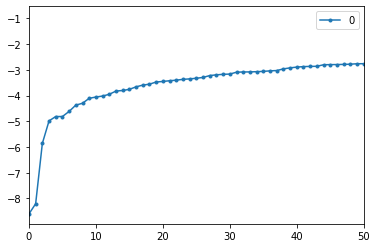

In [71]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

According to this graph, since the value in the 3rd index is a very marginal output and there is no such high change in the values ​​after that, I can set this value as threshold.

-----

Bu grafiğe göre  3. indekste yer alan değer çok marjinal bir çıkış olduğundan dolayı ve sonrasında değerlerde herhangi bir bu şekilde yüksek değişiklik olmadığından dolayı, bu değeri threshold olarak belirleyebilirim.

In [74]:
threshold = np.sort(df_scores)[3]
threshold

-4.984151747711709

In [75]:
df_diamonds[df_scores < threshold]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [76]:
df_diamonds[df_scores < threshold].shape

(3, 7)

In [77]:
df_diamonds.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


What we will discuss here, previously defined 2545 values ​​as outliers, but currently only defines 3 values ​​as outliers. When we try to understand why, the ***depth*** expression of 41918 observations is 78,200, and when we look at the dataset, the maximum value is 79,000. Well, then the following question may come to mind. Why isn't there an observation with a depth value of 79,000?

What we're looking at here is the ***depth*** feature of the 41918 observations while it's 78,200 relates to other features. This relationship is then looked at the neighbors of the 41918 observation. Here is where there is a huge difference, that is, if the ***price*** feature is 1262 and the ***depth*** expression has no close to 78,200 observations, then 41918 observations would be an outlier.

-----

Burada ele alacağımız, daha önceden 2545 değeri outlier olarak tanımlıyorken şu anda sadece 3 değeri outlier olarak tanımlıyor. Bunun nedenini anlamaya çalıştığımızda, 41918 gözleminin ***depth*** ifadesi 78.200, veri setine baktığımızda ise maximum değer 79.000. Peki o zaman aklımıza şu soru gelebilir. 79.000 depth değerine sahip olan bir gözlem neden yok? 

Burada baktığımız şey, 41918 gözleminin ***depth*** özelliği 78.200 iken diğer özelliklerle ilişkisine bakılır. Ardından bu ilişki 41918 gözleminin komşularına bakılır. İşte bu kısımda çok büyük bir fark varsa, yani ***price*** ifadesi 1262 olurken ***depth*** özelliği hiç 78.200 yakın bir gözlem yok ise, bu durumda 41918 gözlemi aykırı değer olur. 

In [78]:
df_diamonds[df_scores < threshold].index

Int64Index([41918, 48410, 49189], dtype='int64')

In [79]:
df_diamonds[df_scores < threshold].drop(axis=0, labels=df_diamonds[df_scores < threshold].index)

,carat,depth,table,price,x,y,z


**Ağaç yöntemleri** kullanıyorsak aykırı değerlere hiç dokunmamayı tercih ediyoruz.Ama illaki çıkarmak istiyorsak o zaman 1. ve 3. quartile değerlerini 1'e 99'luk değer olarak alacağız. Veya 5'e 95'lik değer olarak alacağız.

**Doğrusal yöntemi** kullanıyorsak, bu durumda tüm ciddiyet halen devam ediyor olacak. Bunun başka sonuçlara da bakmamız gerekecek.

-----

If we are using **tree methods**, we prefer not to touch the outliers at all. But if we really want to remove them, then we will take the 1st and 3rd quartiles as 1 by 99. Or we'll take it as a value of 5 by 95.

If we are using **linear methods**, then all seriousness will still be in place. We'll have to look at other consequences of this as well.